<a href="https://colab.research.google.com/github/Nurudeen2020/Python-for-Machine-Learning/blob/main/Loan_No_Loan_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [220]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv" )
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [221]:
loan_data.shape

(491, 14)

In [222]:
loan_data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [223]:
loan_data['Dependents'].value_counts()

0     276
1      85
2      78
3+     43
Name: Dependents, dtype: int64

In [224]:
loan_data['Credit_History'].fillna(value= 1.0 , inplace=True)
loan_data['Gender'].fillna(value= 'Male', inplace=True)
loan_data['Married'].fillna(value= 'Yes', inplace=True)
loan_data['Dependents'].fillna(value= 0, inplace=True)
loan_data['Self_Employed'].fillna(value= 'Yes', inplace=True)
loan_data['LoanAmount'].fillna(value= loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(value= loan_data['Loan_Amount_Term'].median(), inplace=True)

In [225]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [226]:
loan_data.isnull().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [227]:
loan_data.dtypes

Unnamed: 0             int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [228]:
loan_data.drop('Unnamed: 0', axis=1, inplace=True)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [229]:
loan_data.drop('Loan_ID', axis=1, inplace=True)
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [230]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    object 
 1   Married            491 non-null    object 
 2   Dependents         491 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      491 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         491 non-null    float64
 8   Loan_Amount_Term   491 non-null    float64
 9   Credit_History     491 non-null    float64
 10  Property_Area      491 non-null    object 
 11  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 46.2+ KB


In [231]:
X= loan_data.drop('Loan_Status', axis=1)
y= loan_data['Loan_Status']

In [232]:
import sklearn
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state= 101)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


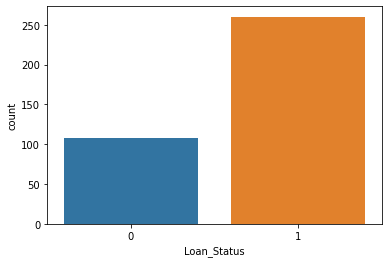

In [234]:
sns.countplot(y_train)

In [235]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [236]:
numerical_data= X_train[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'ApplicantIncome']]

In [237]:
categorical_data= loan_data.drop(numerical_data.columns, axis=1)
categorical_data.nunique()

Gender           2
Married          2
Dependents       5
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

In [238]:
X_train.Dependents.value_counts()

0     206
2      62
1      58
3+     34
0       8
Name: Dependents, dtype: int64

In [239]:
dep= X_train['Dependents'].str.get_dummies(sep= ' ')
dep.head()

,0,1,2,3+
4,0,0,1,0
460,0,1,0,0
156,0,0,1,0
64,0,1,0,0
374,1,0,0,0


In [240]:
loan_data= pd.concat([X_train, dep], axis=1)
loan_data= loan_data.drop('Dependents', axis=1)


loan_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3+
4,Male,Yes,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,0,0,1,0
460,Male,Yes,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,0,1,0,0
156,Male,No,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,0,0,1,0
64,Male,Yes,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,0,1,0,0
374,Female,Yes,Graduate,No,2330,4486.0,100.0,360.0,1.0,Semiurban,1,0,0,0


In [241]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 4 to 351
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             368 non-null    object 
 1   Married            368 non-null    object 
 2   Education          368 non-null    object 
 3   Self_Employed      368 non-null    object 
 4   ApplicantIncome    368 non-null    int64  
 5   CoapplicantIncome  368 non-null    float64
 6   LoanAmount         368 non-null    float64
 7   Loan_Amount_Term   368 non-null    float64
 8   Credit_History     368 non-null    float64
 9   Property_Area      368 non-null    object 
 10  0                  368 non-null    int64  
 11  1                  368 non-null    int64  
 12  2                  368 non-null    int64  
 13  3+                 368 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 43.1+ KB


In [242]:
loan_data= pd.get_dummies(loan_data, columns=['Gender', 'Married'])

loan_data.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3+,Gender_Female,Gender_Male,Married_No,Married_Yes
4,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,0,0,1,0,0,1,0,1
460,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,0,1,0,0,0,1,0,1
156,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,0,0,1,0,0,1,1,0
64,Graduate,Yes,10000,0.0,155.0,360.0,1.0,Rural,0,1,0,0,0,1,0,1
374,Graduate,No,2330,4486.0,100.0,360.0,1.0,Semiurban,1,0,0,0,1,0,0,1


In [243]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 4 to 351
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          368 non-null    object 
 1   Self_Employed      368 non-null    object 
 2   ApplicantIncome    368 non-null    int64  
 3   CoapplicantIncome  368 non-null    float64
 4   LoanAmount         368 non-null    float64
 5   Loan_Amount_Term   368 non-null    float64
 6   Credit_History     368 non-null    float64
 7   Property_Area      368 non-null    object 
 8   0                  368 non-null    int64  
 9   1                  368 non-null    int64  
 10  2                  368 non-null    int64  
 11  3+                 368 non-null    int64  
 12  Gender_Female      368 non-null    uint8  
 13  Gender_Male        368 non-null    uint8  
 14  Married_No         368 non-null    uint8  
 15  Married_Yes        368 non-null    uint8  
dtypes: float64(4), int64(5), o

In [244]:
loan_data= pd.get_dummies(loan_data, columns=['Self_Employed', 'Education'])

loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
4,6700,1750.0,230.0,300.0,1.0,Semiurban,0,0,1,0,0,1,0,1,1,0,1,0
460,2178,0.0,66.0,300.0,0.0,Rural,0,1,0,0,0,1,0,1,0,1,1,0
156,3617,0.0,107.0,360.0,1.0,Semiurban,0,0,1,0,0,1,1,0,1,0,1,0
64,10000,0.0,155.0,360.0,1.0,Rural,0,1,0,0,0,1,0,1,0,1,1,0
374,2330,4486.0,100.0,360.0,1.0,Semiurban,1,0,0,0,1,0,0,1,1,0,1,0


In [245]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 4 to 351
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ApplicantIncome         368 non-null    int64  
 1   CoapplicantIncome       368 non-null    float64
 2   LoanAmount              368 non-null    float64
 3   Loan_Amount_Term        368 non-null    float64
 4   Credit_History          368 non-null    float64
 5   Property_Area           368 non-null    object 
 6   0                       368 non-null    int64  
 7   1                       368 non-null    int64  
 8   2                       368 non-null    int64  
 9   3+                      368 non-null    int64  
 10  Gender_Female           368 non-null    uint8  
 11  Gender_Male             368 non-null    uint8  
 12  Married_No              368 non-null    uint8  
 13  Married_Yes             368 non-null    uint8  
 14  Self_Employed_No        368 non-null    ui

In [246]:
loan_data= pd.get_dummies(loan_data, columns=['Property_Area'])

loan_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2,3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
4,6700,1750.0,230.0,300.0,1.0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0
460,2178,0.0,66.0,300.0,0.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0
156,3617,0.0,107.0,360.0,1.0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0
64,10000,0.0,155.0,360.0,1.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0
374,2330,4486.0,100.0,360.0,1.0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [247]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 4 to 351
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          368 non-null    int64  
 1   CoapplicantIncome        368 non-null    float64
 2   LoanAmount               368 non-null    float64
 3   Loan_Amount_Term         368 non-null    float64
 4   Credit_History           368 non-null    float64
 5   0                        368 non-null    int64  
 6   1                        368 non-null    int64  
 7   2                        368 non-null    int64  
 8   3+                       368 non-null    int64  
 9   Gender_Female            368 non-null    uint8  
 10  Gender_Male              368 non-null    uint8  
 11  Married_No               368 non-null    uint8  
 12  Married_Yes              368 non-null    uint8  
 13  Self_Employed_No         368 non-null    uint8  
 14  Self_Employed_Yes        3

Test data


In [248]:
test_data = X_test.copy()
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
259,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban
18,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban
446,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
198,Male,Yes,2,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural
128,Male,Yes,0,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban


In [249]:
test_data.shape

(123, 11)

In [250]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [251]:
test_data['Credit_History'].fillna(value= 1.0 , inplace=True)
test_data['Gender'].fillna(value= 'Male', inplace=True)
test_data['Married'].fillna(value= 'Yes', inplace=True)
test_data['Dependents'].fillna(value= 0, inplace=True)
test_data['Self_Employed'].fillna(value= 'Yes', inplace=True)
test_data['LoanAmount'].fillna(value= loan_data['LoanAmount'].mean(), inplace=True)
test_data['Loan_Amount_Term'].fillna(value= loan_data['Loan_Amount_Term'].median(), inplace=True)

In [252]:
test_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [253]:
test_data.Dependents.value_counts()

0     70
1     27
2     16
3+     9
0      1
Name: Dependents, dtype: int64

In [254]:
dep= test_data['Dependents'].str.get_dummies(sep= ' ')
dep.head()

,0,1,2,3+
259,0,0,0,1
18,0,1,0,0
446,1,0,0,0
198,0,0,1,0
128,1,0,0,0


In [255]:
test_data= pd.concat([test_data, dep], axis=1)
test_data= test_data.drop('Dependents', axis=1)

test_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3+
259,Male,Yes,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0,0,1
18,Male,Yes,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,1,0,0
446,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,0
198,Male,Yes,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,0,0,1,0
128,Male,Yes,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban,1,0,0,0


In [256]:
test_data= pd.get_dummies(test_data, columns=['Gender', 'Married'])

test_data.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3+,Gender_Female,Gender_Male,Married_No,Married_Yes
259,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0,0,1,0,1,0,1
18,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,1,0,0,0,1,0,1
446,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,0,0,1,0,1
198,Not Graduate,No,4200,1430.0,129.0,360.0,1.0,Rural,0,0,1,0,0,1,0,1
128,Graduate,No,2130,6666.0,70.0,180.0,1.0,Semiurban,1,0,0,0,0,1,0,1


In [257]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 259 to 51
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          123 non-null    object 
 1   Self_Employed      123 non-null    object 
 2   ApplicantIncome    123 non-null    int64  
 3   CoapplicantIncome  123 non-null    float64
 4   LoanAmount         123 non-null    float64
 5   Loan_Amount_Term   123 non-null    float64
 6   Credit_History     123 non-null    float64
 7   Property_Area      123 non-null    object 
 8   0                  123 non-null    int64  
 9   1                  123 non-null    int64  
 10  2                  123 non-null    int64  
 11  3+                 123 non-null    int64  
 12  Gender_Female      123 non-null    uint8  
 13  Gender_Male        123 non-null    uint8  
 14  Married_No         123 non-null    uint8  
 15  Married_Yes        123 non-null    uint8  
dtypes: float64(4), int64(5), 

In [258]:
test_data= pd.get_dummies(test_data, columns=['Self_Employed', 'Education'])

test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2,3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
259,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0,0,1,0,1,0,1,1,0,1,0
18,12841,10968.0,349.0,360.0,1.0,Semiurban,0,1,0,0,0,1,0,1,1,0,1,0
446,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,0,0,1,0,1,1,0,0,1
198,4200,1430.0,129.0,360.0,1.0,Rural,0,0,1,0,0,1,0,1,1,0,0,1
128,2130,6666.0,70.0,180.0,1.0,Semiurban,1,0,0,0,0,1,0,1,1,0,1,0


In [259]:
test_data= pd.get_dummies(test_data, columns=['Property_Area'])

test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2,3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
259,3036,2504.0,158.0,360.0,0.0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0
18,12841,10968.0,349.0,360.0,1.0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0
446,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1
198,4200,1430.0,129.0,360.0,1.0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0
128,2130,6666.0,70.0,180.0,1.0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0


In [260]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 259 to 51
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          123 non-null    int64  
 1   CoapplicantIncome        123 non-null    float64
 2   LoanAmount               123 non-null    float64
 3   Loan_Amount_Term         123 non-null    float64
 4   Credit_History           123 non-null    float64
 5   0                        123 non-null    int64  
 6   1                        123 non-null    int64  
 7   2                        123 non-null    int64  
 8   3+                       123 non-null    int64  
 9   Gender_Female            123 non-null    uint8  
 10  Gender_Male              123 non-null    uint8  
 11  Married_No               123 non-null    uint8  
 12  Married_Yes              123 non-null    uint8  
 13  Self_Employed_No         123 non-null    uint8  
 14  Self_Employed_Yes        

Model Building

In [261]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [262]:
model= LogisticRegression(max_iter=1000)
model.fit(loan_data, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

In [263]:
from sklearn.metrics import f1_score

In [264]:
f1_score(y_test, model.predict(test_data))

0.8723404255319148

In [265]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [266]:
forest= RandomForestClassifier(random_state= 101, n_estimators=1000, max_depth=5)
forest.fit(loan_data, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [267]:
f1_score(y_test, forest.predict(test_data))

0.8723404255319148

In [268]:
predictions= model.predict(test_data)
print(predictions)

[0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1]


In [269]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_data" is your new test dataset
res.columns = ["predictions"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_HP.csv')         
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [270]:
pip install boruta

In [271]:
from boruta import BorutaPy

In [272]:
rfc= RandomForestClassifier(random_state= 101, n_estimators=1000, max_depth=5)
boruta_selector= BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=101)

In [273]:
boruta_selector.fit(np.array(loan_data), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	17
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	17
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	17
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	17
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	18
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	18
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	18
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	18
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	18
I

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=5, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=40, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F866165A780,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='au

In [274]:
print("Selected Feature:", boruta_selector.support_)

print("Ranking:", boruta_selector.ranking_)

print("No of significant features:", boruta_selector.n_features_)

Selected Feature: [False False False False  True False False False False False False False
 False False False False False False False False]
Ranking: [ 2  3  4  5  1 18 11 20 13 11 10  8  8 15 14 19 16  8  6 16]
No of significant features: 1


In [275]:
selected_rf_features= pd.DataFrame({"Feature": list(loan_data.columns),
                                    'Ranking': boruta_selector.ranking_})
selected_rf_features.sort_values(by= 'Ranking')

,Feature,Ranking
4,Credit_History,1
0,ApplicantIncome,2
1,CoapplicantIncome,3
2,LoanAmount,4
3,Loan_Amount_Term,5
18,Property_Area_Semiurban,6
17,Property_Area_Rural,8
12,Married_Yes,8
11,Married_No,8
10,Gender_Male,10


In [276]:
X_important_train= boruta_selector.transform(np.array(loan_data))
X_important_test= boruta_selector.transform(np.array(test_data))

In [277]:
rf_important= RandomForestClassifier(random_state= 101, n_estimators=1000, n_jobs= -1)

In [278]:
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=101, verbose=0,
                       warm_start=False)

In [279]:
f1_score(y_test, rf_important.predict(X_important_test))

0.8723404255319148

In [280]:
from sklearn.model_selection import GridSearchCV


In [281]:
param_grid= {'bootstrap': [True, False],
             'max_depth': [5, 10, 15],
             'n_estimators': [500, 1000]}

In [282]:
rf= RandomForestClassifier(random_state=101)
grid_search = GridSearchCV(estimator=rf, param_grid= param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   19.5s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [283]:
f1_score(y_test, grid_search.predict(X_important_test))

0.8723404255319148